Pre process the data

Loaded dataset with shape: (5179742, 11)
Selected 9 essential columns: PERMNO, PERMCO, CUSIP, Ticker, SICCD, NAICS, MthCalDt, MthRet, sprtrn

=== First 5 rows of the dataset ===

=== Missing Values Summary ===
        Missing Values  Percentage
CUSIP           571542   11.034179
Ticker          503406    9.718747
MthRet           83530    1.612629
sprtrn             509    0.009827


/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_returns.py:317: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  market_returns[self.market_return_column] = market_returns[self.market_return_column].fillna(method='ffill').fillna(method='bfill')


Filled 509 missing market returns using time-series interpolation.


/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_returns.py:334: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  self.data['CUSIP'] = self.data.groupby(self.id_column)['CUSIP'].fillna(method='ffill')
/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_returns.py:334: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data['CUSIP'] = self.data.groupby(self.id_column)['CUSIP'].fillna(method='ffill')
/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_returns.py:334: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_opti

Filled 396841 missing CUSIP values within security groups.
Note: 174701 CUSIP values remain missing for securities with no valid CUSIP.
Removed 83530 rows with missing return values.
Total rows removed: 83530 (1.61% of original data)
Date conversion complete.

=== Dataset Overview ===
Shape: (5096212, 9)

=== Data Types ===
PERMNO               int64
PERMCO               int64
CUSIP               object
Ticker              object
SICCD                int64
NAICS                int64
MthCalDt    datetime64[ns]
MthRet             float64
sprtrn             float64
dtype: object

=== Return Statistics ===
count    5.096212e+06
mean     9.970718e-03
std      1.744244e-01
min     -1.000000e+00
25%     -5.691100e-02
50%      1.520000e-04
75%      6.130900e-02
max      3.900000e+01
Name: MthRet, dtype: float64

=== Categorical Columns ===
CUSIP: 52377 unique values
Ticker: 35484 unique values


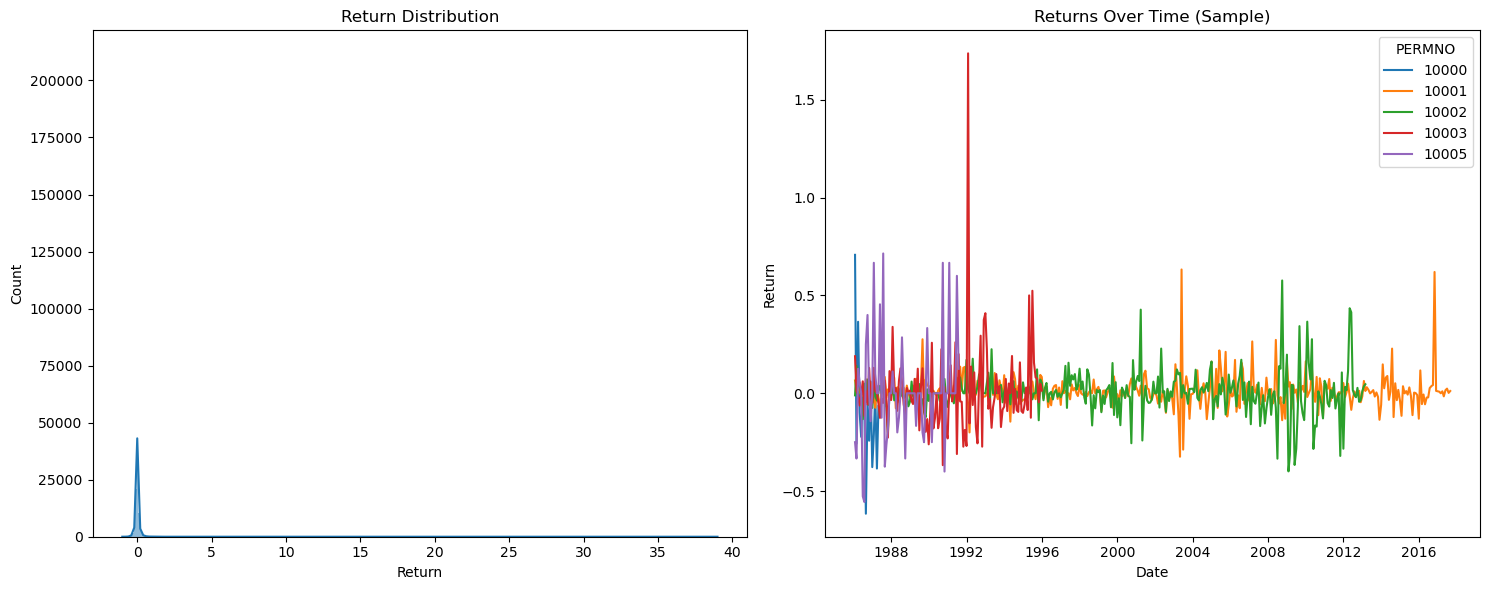


=== Time Range ===
Dataset spans from 1926-01-30 00:00:00 to 2024-12-31 00:00:00

=== Securities ===
Dataset contains 38851 unique securities

=== Observations per Security ===
Mean: 131.17
Median: 78.00
Min: 1
Max: 1405

=== Extreme Returns ===
Found 76136 returns with absolute value > 50.0%
     PERMNO  PERMCO     CUSIP Ticker  SICCD   NAICS   MthCalDt    MthRet  \
0     10000    7952  68391610  OMFGA   3990       0 1986-01-31  0.707317   
7     10000    7952  68391610  OMFGA   3990       0 1986-08-29 -0.615385   
227   10001    7953  29274A10   EWST   4920       0 2003-05-30  0.632495   
389   10001    7953  36720410   EGAS   4925  221210 2016-10-31  0.619769   
673   10002    7954  05978R10   BTFG   6020  551111 2008-09-30  0.576326   

       sprtrn  
0    0.002367  
7    0.071193  
227  0.050899  
389 -0.019426  
673 -0.090791  

=== Return-Market Correlation ===
         MthRet   sprtrn
MthRet  1.00000  0.26722
sprtrn  0.26722  1.00000
Data sorted in chronological order from 19

'datasets/PostProcessed/Returns/processed_returns.csv'

In [1]:
from preprocessing.preprocessing_returns import ReturnPreprocessor

# Set the file path to your returns dataset
file_path = "datasets/Targets/monthly_crsp.csv"  # Replace with your actual file path

# Create an instance of the ReturnPreprocessor
processor = ReturnPreprocessor(
    id_column='PERMNO',
    date_column='MthCalDt',
    return_column='MthRet',
    market_return_column='sprtrn'
)

# Load the dataset (use nrows parameter if the dataset is very large)
# For example, to load just the first 100,000 rows for initial exploration:
processor.load(file_path)

processor.select_essential_columns()

# Display the first few rows of the dataset
print("\n=== First 5 rows of the dataset ===")
processor.data.head()

# Check for missing values in the dataset
missing_values = processor.check_missing_values()

# Handle missing values
processor.handle_missing_values()

# Convert date column to datetime format
processor.convert_dates()

# Get summary statistics about the dataset
processor.summarize()

# Plot return distribution and time series
processor.plot_returns_overview(sample_size=5)

# Additional analysis: Check the time range of the dataset
min_date = processor.data[processor.date_column].min()
max_date = processor.data[processor.date_column].max()
print(f"\n=== Time Range ===")
print(f"Dataset spans from {min_date} to {max_date}")

# Count the number of unique securities in the dataset
unique_securities = processor.data[processor.id_column].nunique()
print(f"\n=== Securities ===")
print(f"Dataset contains {unique_securities} unique securities")

# Calculate average number of observations per security
obs_per_security = processor.data.groupby(processor.id_column).size()
print(f"\n=== Observations per Security ===")
print(f"Mean: {obs_per_security.mean():.2f}")
print(f"Median: {obs_per_security.median():.2f}")
print(f"Min: {obs_per_security.min()}")
print(f"Max: {obs_per_security.max()}")

# Check for extreme returns
extreme_threshold = 0.5  # 50% return in a month
extreme_returns = processor.data[abs(processor.data[processor.return_column]) > extreme_threshold]
print(f"\n=== Extreme Returns ===")
print(f"Found {len(extreme_returns)} returns with absolute value > {extreme_threshold*100}%")
if len(extreme_returns) > 0:
    print(extreme_returns.head())

# Correlation between stock returns and market returns
correlation = processor.data[[processor.return_column, processor.market_return_column]].corr()
print(f"\n=== Return-Market Correlation ===")
print(correlation)

# Get the processed data for further analysis or modeling
returns_data = processor.get_data()

processor.sort_by_date(ascending=True)  # Sort chronologically (oldest first)

processor.filter_by_date(start_date='2000-01-01')


# Optional: Export the processed data to a parquet file for efficient storage
processor.export("datasets/PostProcessed/Returns/processed_returns.csv", format="csv")


Pre processinf of JKP Predictor

Loaded dataset with shape: (144620, 9)

=== Dataset Overview ===
Shape: (144620, 9)

=== Data Types ===
location         object
name             object
freq             object
weighting        object
direction         int64
n_stocks          int64
n_stocks_min      int64
date             object
ret             float64
dtype: object

=== Missing Values ===
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

=== Factor Return Statistics ===
count    144620.000000
mean          0.002046
std           0.030145
min          -0.594595
25%          -0.009873
50%           0.001795
75%           0.013829
max           0.542959
Name: ret, dtype: float64

=== Categorical Columns ===
location: 1 unique values
Values: ['usa']
name: 153 unique values
freq: 1 unique values
Values: ['monthly']
weighting: 1 unique values
Values: ['vw_cap']
date: 1188 unique values

=== Time Range ===
From 1926-01-31 00:00:00 to 2024-12-31 00:00:00

=== Factor Count ===
Dataset contains 153 unique factors


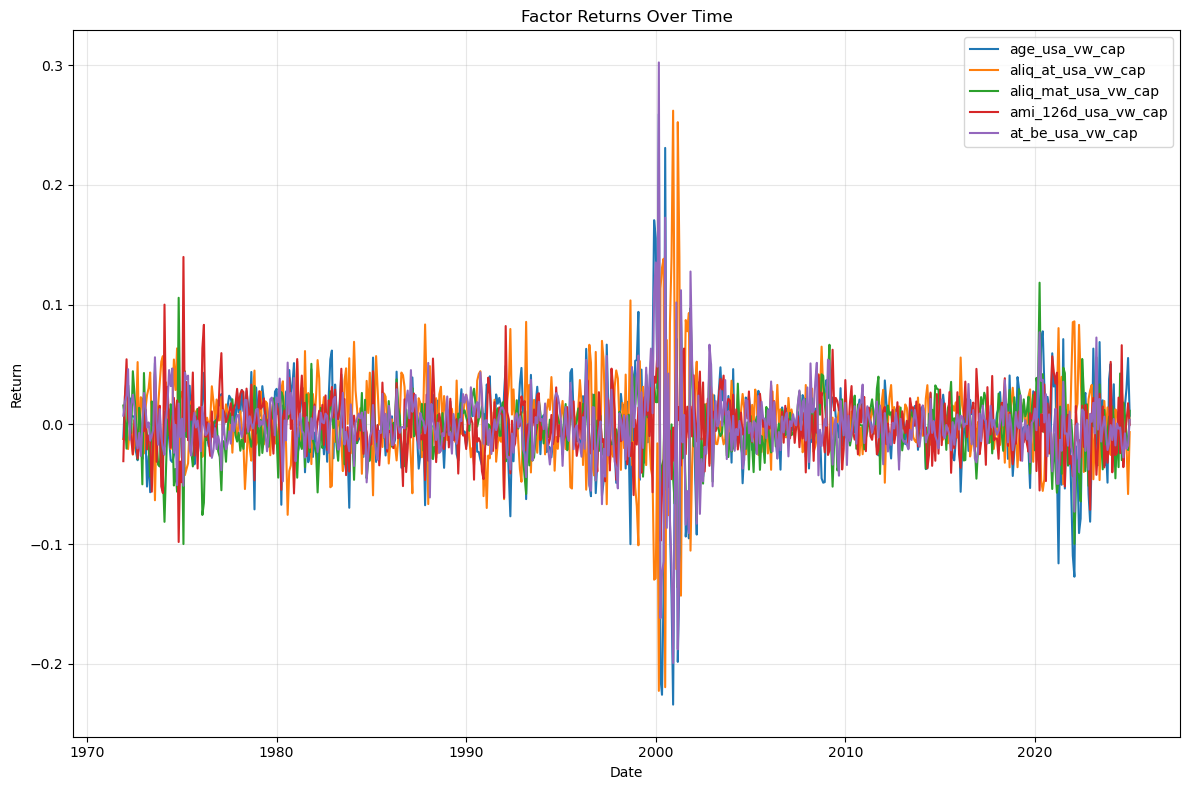

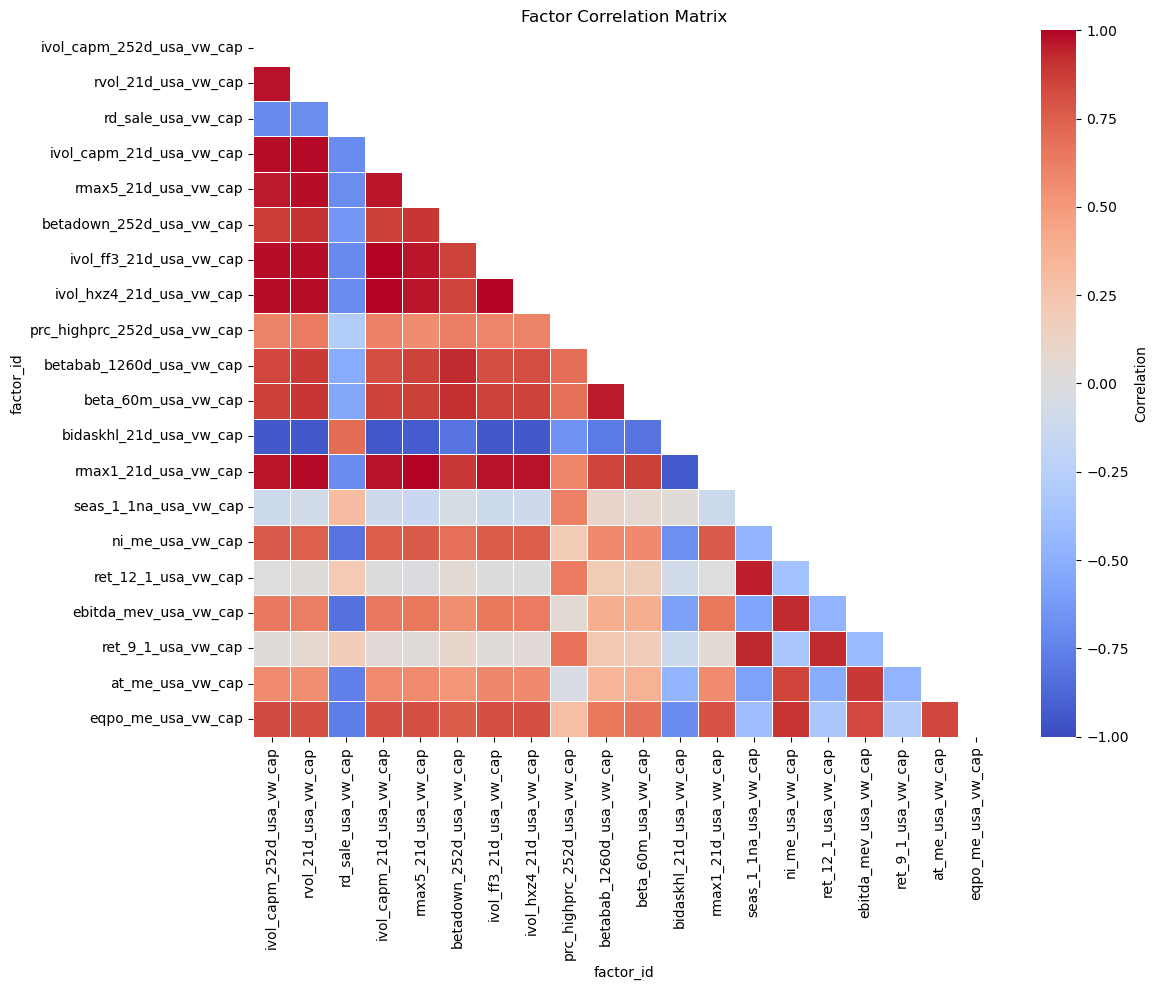


=== Processed Factor Data ===
factor_id   age_usa_vw_cap  aliq_at_usa_vw_cap  aliq_mat_usa_vw_cap  \
date                                                                  
1971-11-30       -0.012210           -0.012192             0.015717   
1971-12-31        0.023513           -0.012597             0.002655   
1972-01-31        0.037883           -0.006803            -0.020244   
1972-02-29        0.017806           -0.020629             0.032789   
1972-03-31        0.021974           -0.004887             0.018203   

factor_id   ami_126d_usa_vw_cap  at_be_usa_vw_cap  at_gr1_usa_vw_cap  \
date                                                                   
1971-11-30            -0.030753          0.007268          -0.013389   
1971-12-31             0.023714          0.018838          -0.003731   
1972-01-31             0.054369          0.024247           0.010442   
1972-02-29             0.005368          0.046086          -0.015176   
1972-03-31            -0.000649        

'datasets/PostProcessed/Predictors/processed_jkp_factors_transformed.csv'

In [4]:
# Import necessary libraries
from preprocessing.preprocessing_jkp import JkpPreprocessor


# Define the PredictorPreprocessor class
# [Insert the PredictorPreprocessor class definition here]

# Now let's use the class to preprocess the JKP factor dataset

# Set the file path to the JKP factor dataset
file_path = "datasets/Predictors/[usa]_[all_factors]_[monthly]_[vw_cap].csv"  # Replace with your actual file path

# Create an instance of the PredictorPreprocessor
processor = JkpPreprocessor(
    date_column='date',
    return_column='ret'
)

# Load the dataset
processor.load(file_path)

# Explore the dataset
processor.explore_data()

# Convert dates to datetime format
processor.convert_dates()

# Handle missing values using forward fill within each factor group
processor.handle_missing_values(method='ffill')


# Pivot the data to create a time series of factor returns
processor.pivot_factors()

processor.handle_pivoted_missing_values(method='drop_sparse')


# # Handle outliers using winsorization
# processor.handle_outliers(method='winsorize')

# # Normalize the factor returns using standardization
# processor.normalize_factors(method='standardize')

# # Create lagged features
# processor.create_lagged_features(lags=[1, 3, 6, 12])

# # Create rolling window features
# processor.create_rolling_features(windows=[3, 6, 12], functions=['mean', 'std'])

# Plot factor returns for a sample of factors
processor.plot_factor_returns(n_factors=5)

# Plot factor correlations
processor.plot_factor_correlations(n_factors=20)

# Optional: Reduce dimensions using PCA
# processor.reduce_dimensions(variance_threshold=0.95)

# Get the processed factor data
factor_data = processor.get_data()

# Display the first few rows of the processed data
print("\n=== Processed Factor Data ===")
print(factor_data.head())

# Export the processed data
processor.export("datasets/PostProcessed/Predictors/processed_jkp_factors_transformed.csv", format="csv")


Loaded dataset with shape: (144620, 9)
Date conversion complete.
Handling missing values...
No missing values found.
Creating dataset with factor columns...
Found 153 unique factors across 1188 dates


/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_jkp.py:1265: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  factor_columns_data[factor] = factor_series
/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_jkp.py:1265: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  factor_columns_data[factor] = factor_series
/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_jkp.py:1265: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

Created factor columns dataset with shape: (1188, 153)
Contains 153 factor columns

Handling missing values in factor columns data...
Missing values: 37144 out of 181764 cells (20.44%)
All missing values have been handled

=== Factor Columns Data ===
                 age   aliq_at  aliq_mat  ami_126d     at_be    at_gr1  \
1926-01-31 -0.086738 -0.036842 -0.017283 -0.001413  0.014689 -0.012208   
1926-02-28 -0.086738 -0.036842 -0.017283 -0.001413  0.014689 -0.012208   
1926-03-31 -0.086738 -0.036842 -0.017283 -0.001413  0.014689 -0.012208   
1926-04-30 -0.000572 -0.036842 -0.017283 -0.001413  0.014689 -0.012208   
1926-05-31 -0.006332 -0.036842 -0.017283 -0.003118  0.014689 -0.012208   

               at_me  at_turnover   be_gr1a    be_me  ...  taccruals_at  \
1926-01-31  0.025131      0.00209  0.035115  0.05072  ...     -0.000944   
1926-02-28  0.025131      0.00209  0.035115  0.05072  ...     -0.000944   
1926-03-31  0.025131      0.00209  0.035115  0.05072  ...     -0.000944   
1926

/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_jkp.py:660: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  original_data = original_data.fillna(method='ffill').fillna(method='bfill')
/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_jkp.py:737: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.factor_data = self.factor_data.fillna(method='ffill').fillna(method='bfill')


Processed factor data exported to datasets/PostProcessed/Predictors/jkp_factors_transformed.csv
Shape: (638, 153)


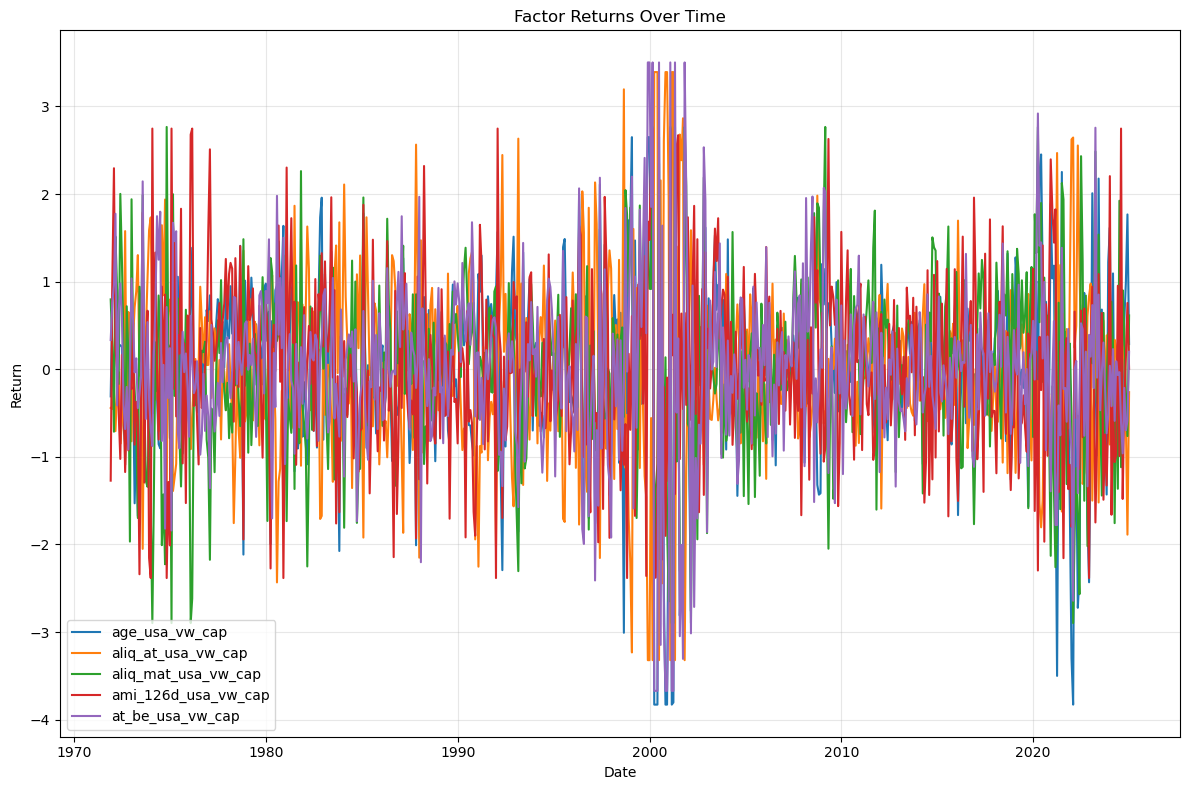

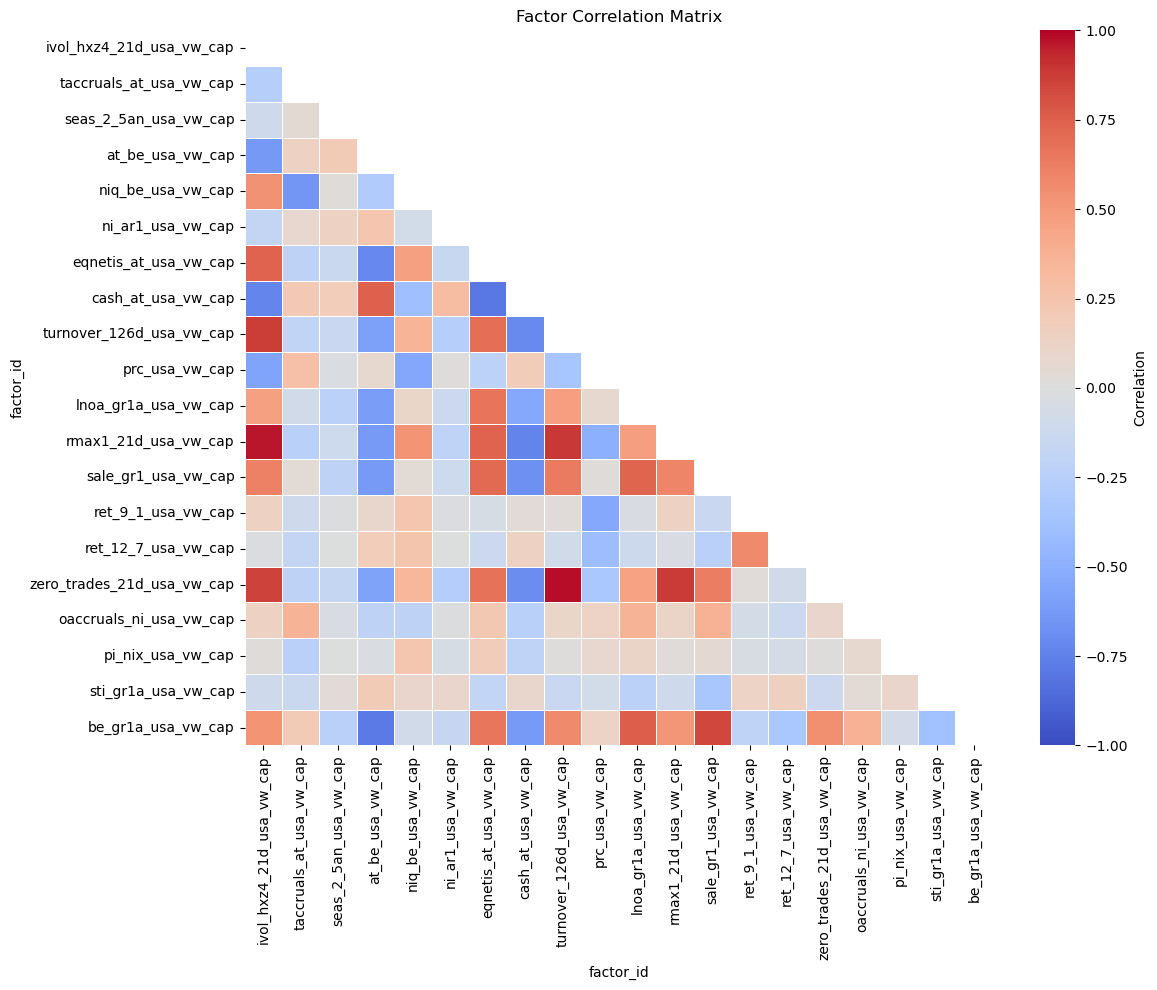


=== Processed Data Processing Complete ===
Processed data shape: (638, 153)
Sample of processed data:
factor_id   age_usa_vw_cap  aliq_at_usa_vw_cap  aliq_mat_usa_vw_cap  \
date                                                                  
1971-11-30       -0.309920           -0.441622             0.797420   
1971-12-31        0.787112           -0.454362             0.248670   
1972-01-31        1.228405           -0.272283            -0.713318   
1972-02-29        0.611853           -0.706766             1.514644   
1972-03-31        0.739853           -0.212070             0.901870   

factor_id   ami_126d_usa_vw_cap  at_be_usa_vw_cap  at_gr1_usa_vw_cap  \
date                                                                   
1971-11-30            -1.272028          0.333367          -0.660248   
1971-12-31             1.010059          0.762914          -0.271129   
1972-01-31             2.294460          0.963694           0.299858   
1972-02-29             0.241402        

In [3]:
# Import necessary libraries
from preprocessing.preprocessing_jkp import JkpPreprocessor

# Example usage
preprocessor = JkpPreprocessor()
file_path = "datasets/Predictors/[usa]_[all_factors]_[monthly]_[vw_cap].csv"  # Replace with your actual file path

# Initialize preprocessor
preprocessor = JkpPreprocessor()
# Load data
preprocessor.load(file_path)

# Convert dates
preprocessor.convert_dates()

# Handle missing values in the raw data
preprocessor.handle_missing_values(method='ffill')

# Create a dataset with factor columns (each factor from 'name' becomes a column)
preprocessor.create_factor_columns_dataset()

# Handle missing values in the factor columns dataset
preprocessor.handle_factor_columns_missing_values(method='ffill')

# Export the factor columns dataset
preprocessor.export_factor_columns_data(
    "datasets/PostProcessed/Predictors/jkp_factors_untransformed.csv",
    format="csv",
)
factor_columns_data = preprocessor.get_factor_columns_data()

print("\n=== Factor Columns Data Processing Complete ===")
print(f"Factor columns data shape: {factor_columns_data.shape}")
print("Sample of factor columns data:")
print(factor_columns_data.head())

# Pivot the data for the transformed version
preprocessor.pivot_factors()

# Handle missing values in the pivoted data
preprocessor.handle_pivoted_missing_values(method='drop_sparse')

# Handle outliers
preprocessor.handle_outliers(method='winsorize')

# Normalize factors
preprocessor.normalize_factors(method='standardize')

# Export the processed factor data
preprocessor.export_processed_data(
    "datasets/PostProcessed/Predictors/jkp_factors_transformed.csv",
    format="csv",
)
processed_data = preprocessor.get_processed_data()

# Plot factor returns for a sample of factors
preprocessor.plot_factor_returns(n_factors=5)

# Plot factor correlations
preprocessor.plot_factor_correlations(n_factors=20)

print("\n=== Processed Data Processing Complete ===")
print(f"Processed data shape: {processed_data.shape}")
print("Sample of processed data:")
print(processed_data.head())



Loaded dataset with shape: (144620, 9)
Date conversion complete.

Handling missing values in raw data...
Missing values: 0 out of 1301580 cells (0.00%)
No missing values found.
Creating dataset with factor columns...
Found 153 unique factors across 1188 dates


/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_jkp_cleaned.py:1134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  factor_columns_data[factor] = factor_series
/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_jkp_cleaned.py:1134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  factor_columns_data[factor] = factor_series
/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_jkp_cleaned.py:1134: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

Created factor columns dataset with shape: (1188, 153)
Contains 153 factor columns

Handling missing values in factor columns data...
Missing values: 37144 out of 181764 cells (20.44%)
All missing values have been handled

=== Factor Columns Data ===
                 age   aliq_at  aliq_mat  ami_126d     at_be    at_gr1  \
1926-01-31 -0.086738 -0.036842 -0.017283 -0.001413  0.014689 -0.012208   
1926-02-28 -0.086738 -0.036842 -0.017283 -0.001413  0.014689 -0.012208   
1926-03-31 -0.086738 -0.036842 -0.017283 -0.001413  0.014689 -0.012208   
1926-04-30 -0.000572 -0.036842 -0.017283 -0.001413  0.014689 -0.012208   
1926-05-31 -0.006332 -0.036842 -0.017283 -0.003118  0.014689 -0.012208   

               at_me  at_turnover   be_gr1a    be_me  ...  taccruals_at  \
1926-01-31  0.025131      0.00209  0.035115  0.05072  ...     -0.000944   
1926-02-28  0.025131      0.00209  0.035115  0.05072  ...     -0.000944   
1926-03-31  0.025131      0.00209  0.035115  0.05072  ...     -0.000944   
1926

/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_jkp_cleaned.py:585: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  original_data = original_data.fillna(method='ffill').fillna(method='bfill')
/home/Loris/EPFL/MA2/MLFIN/Project/preprocessing/preprocessing_jkp_cleaned.py:662: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.factor_data = self.factor_data.fillna(method='ffill').fillna(method='bfill')


Processed factor data exported to path/to/processed_data.csv
Shape: (638, 153)


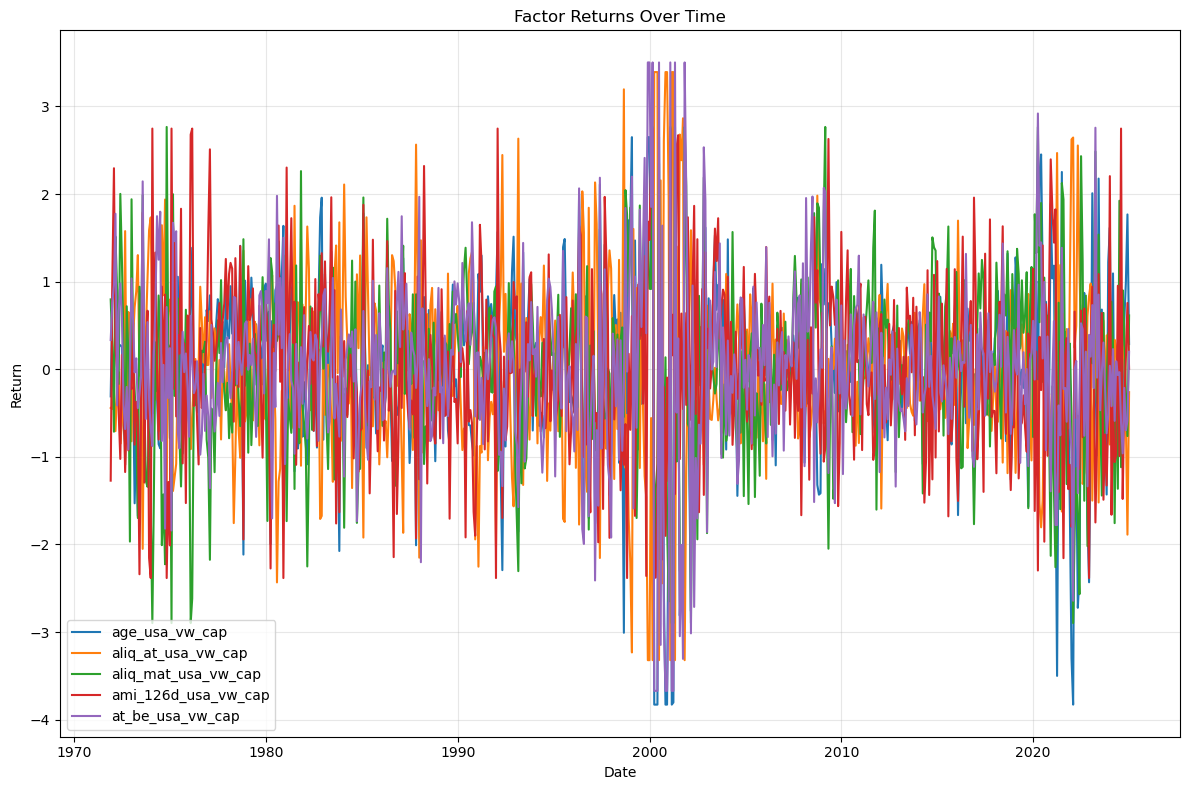

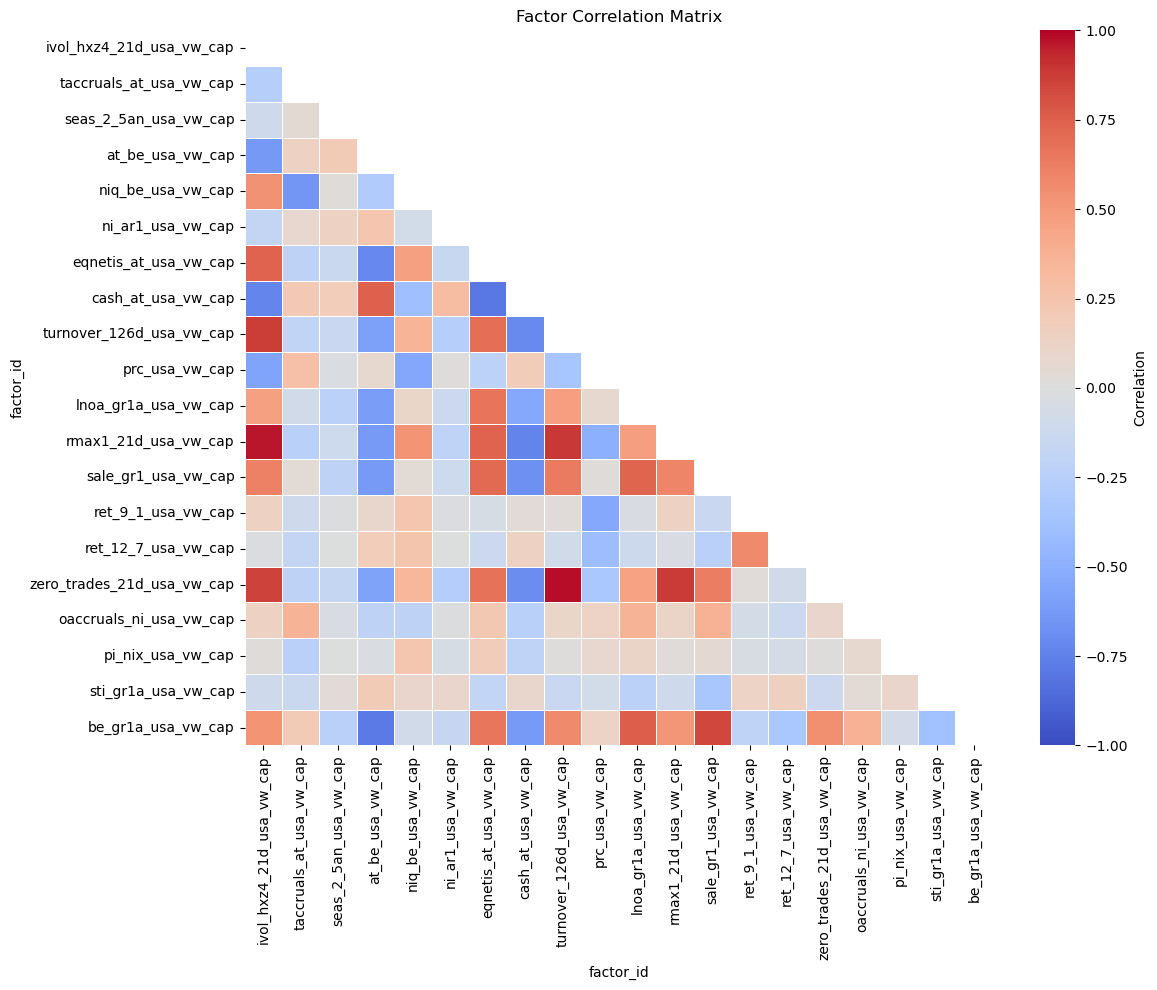


=== Processed Data Processing Complete ===
Processed data shape: (638, 153)
Sample of processed data:
factor_id   age_usa_vw_cap  aliq_at_usa_vw_cap  aliq_mat_usa_vw_cap  \
date                                                                  
1971-11-30       -0.309920           -0.441622             0.797420   
1971-12-31        0.787112           -0.454362             0.248670   
1972-01-31        1.228405           -0.272283            -0.713318   
1972-02-29        0.611853           -0.706766             1.514644   
1972-03-31        0.739853           -0.212070             0.901870   

factor_id   ami_126d_usa_vw_cap  at_be_usa_vw_cap  at_gr1_usa_vw_cap  \
date                                                                   
1971-11-30            -1.272028          0.333367          -0.660248   
1971-12-31             1.010059          0.762914          -0.271129   
1972-01-31             2.294460          0.963694           0.299858   
1972-02-29             0.241402        

In [ ]:
# Import necessary libraries
from preprocessing.preprocessing_jkp_cleaned import JkpPreprocessor

# Example usage
preprocessor = JkpPreprocessor()
file_path = "datasets/Predictors/[usa]_[all_factors]_[monthly]_[vw_cap].csv"  # Replace with your actual file path

# Initialize preprocessor
preprocessor = JkpPreprocessor()
# Load data
preprocessor.load(file_path)

# Convert dates
preprocessor.convert_dates()

# Handle missing values in the raw data
preprocessor.handle_missing_values(data_type='raw', method='ffill')

# Create a dataset with factor columns (each factor from 'name' becomes a column)
preprocessor.create_factor_columns_dataset()

# Handle missing values in the factor columns dataset
preprocessor.handle_missing_values(data_type='factor_columns', method='ffill')

# Export the factor columns dataset
preprocessor.export_data(file_path="path/to/factor_columns_data.csv", data_type='factor_columns', format='csv', date_column_name='date')

factor_columns_data = preprocessor.get_factor_columns_data()

print("\n=== Factor Columns Data Processing Complete ===")
print(f"Factor columns data shape: {factor_columns_data.shape}")
print("Sample of factor columns data:")
print(factor_columns_data.head())

# Pivot the data for the transformed version
preprocessor.pivot_factors()

# Handle missing values in the pivoted data
preprocessor.handle_missing_values(data_type='pivoted', method='drop_sparse')

# Handle outliers
preprocessor.handle_outliers(method='winsorize')

# Normalize factors
preprocessor.normalize_factors(method='standardize')

# Export the processed factor data
preprocessor.export_data(file_path="path/to/processed_data.csv", data_type='processed', format='csv', date_column_name='date')

processed_data = preprocessor.get_data(data_type='processed')

print(processed_data.head())

# Plot factor returns for a sample of factors
preprocessor.plot_factor_returns(n_factors=5)

# Plot factor correlations
preprocessor.plot_factor_correlations(n_factors=20)

print("\n=== Processed Data Processing Complete ===")
print(f"Processed data shape: {processed_data.shape}")
print("Sample of processed data:")
print(processed_data.head())

